In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim

from model import Generator
from dataset import EmbedImagePairs
from train import train, test, synthesize

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Generator(128).to(device)

trn_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/train_avg', size=64, n_hidden=128), batch_size=200, shuffle=True)
val_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/val', size=64, n_hidden=128, train=False), batch_size=100)
dataloader_dict = {'train': trn_dataloader, 'val': val_dataloader}

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [3]:
!rm -r "models/pytorch/128_avg"
!mkdir -p "models/pytorch/128_avg"

In [ ]:
# uncomment out if you want to compute validation metrics using dlib
# !pip install dlib

# !mkdir -p "models/dlib"

# !wget "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2" -O "models/dlib/facerec.dat.bz2"
# !wget "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2" -O "models/dlib/facelandmarks.dat.bz2"

# !bzip2 -d "models/dlib/facerec.dat.bz2"
# !bzip2 -d "models/dlib/facelandmarks.dat.bz2"

In [13]:
import dlib

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor('models/dlib/facelandmarks.dat')
face_embedder = dlib.face_recognition_model_v1('models/dlib/facerec.dat')

dlib_models = [face_detector, landmark_detector, face_embedder]

In [5]:
num_epochs=150

train(model, dataloader_dict, criterion, optimizer, device, out_name='models/pytorch/128_avg/model', 
      dlib_models=dlib_models, validate=True, validate_every=10, num_epochs=num_epochs)

  7%|▋         | 10/150 [00:20<05:00,  2.14s/it]

saving
Epoch:  10 Train Loss: 0.009376878282804599 Val Loss: 0.08896000373416242 Average Distance: 0.8052436568988842


 13%|█▎        | 20/150 [00:40<05:03,  2.33s/it]

saving
Epoch:  20 Train Loss: 0.004676256826597041 Val Loss: 0.09501569685155312 Average Distance: 0.6370484876460242


 20%|██        | 30/150 [01:00<04:41,  2.35s/it]

saving
Epoch:  30 Train Loss: 0.00331366250569793 Val Loss: 0.09339366985105835 Average Distance: 0.5910735601003303


 27%|██▋       | 40/150 [01:20<04:18,  2.35s/it]

saving
Epoch:  40 Train Loss: 0.002607006675981242 Val Loss: 0.09353895406279944 Average Distance: 0.5583496601795751


 33%|███▎      | 50/150 [01:40<03:55,  2.35s/it]

saving
Epoch:  50 Train Loss: 0.002055164688834171 Val Loss: 0.09594682432645191 Average Distance: 0.5532423770502541


 40%|████      | 60/150 [01:59<03:30,  2.33s/it]

saving
Epoch:  60 Train Loss: 0.0018289349705580323 Val Loss: 0.10051486271936282 Average Distance: 0.561652099382005


 47%|████▋     | 70/150 [02:19<03:06,  2.34s/it]

saving
Epoch:  70 Train Loss: 0.0015449769990304593 Val Loss: 0.09597820861149678 Average Distance: 0.5166430962127265


 53%|█████▎    | 80/150 [02:39<02:45,  2.36s/it]

saving
Epoch:  80 Train Loss: 0.0013039676986377814 Val Loss: 0.09444779955444083 Average Distance: 0.5094525474196988


 60%|██████    | 90/150 [02:59<02:20,  2.35s/it]

saving
Epoch:  90 Train Loss: 0.001256989268318418 Val Loss: 0.0984197390817963 Average Distance: 0.5060732266576173


 67%|██████▋   | 100/150 [03:19<01:57,  2.34s/it]

saving
Epoch:  100 Train Loss: 0.0011493658055497825 Val Loss: 0.0972543229571486 Average Distance: 0.49793380246853747


 73%|███████▎  | 110/150 [03:39<01:34,  2.37s/it]

saving
Epoch:  110 Train Loss: 0.0010649999603629112 Val Loss: 0.10048292616827298 Average Distance: 0.49670535358364704


 80%|████████  | 120/150 [03:59<01:10,  2.34s/it]

saving
Epoch:  120 Train Loss: 0.0009532509968434086 Val Loss: 0.09550459504918715 Average Distance: 0.48931524865686954


 87%|████████▋ | 130/150 [04:19<00:46,  2.35s/it]

saving
Epoch:  130 Train Loss: 0.0008974865496415516 Val Loss: 0.09794084767324734 Average Distance: 0.4883047007761215


 93%|█████████▎| 140/150 [04:39<00:23,  2.34s/it]

saving
Epoch:  140 Train Loss: 0.0008433432045296349 Val Loss: 0.09413699258481507 Average Distance: 0.47868208058142386


100%|██████████| 150/150 [04:59<00:00,  2.34s/it]

saving
Epoch:  150 Train Loss: 0.0007595212932076605 Val Loss: 0.09388120043857963 Average Distance: 0.47993047547184503
saving


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

In [3]:
trn_losses = np.load('models/pytorch/128_avg/modeltrn_losses.npy')
val_losses = np.load('models/pytorch/128_avg/modelval_losses.npy')
avg_dists = np.load('models/pytorch/128_avg/modelavg_dists.npy')

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'average distance (validation)'))

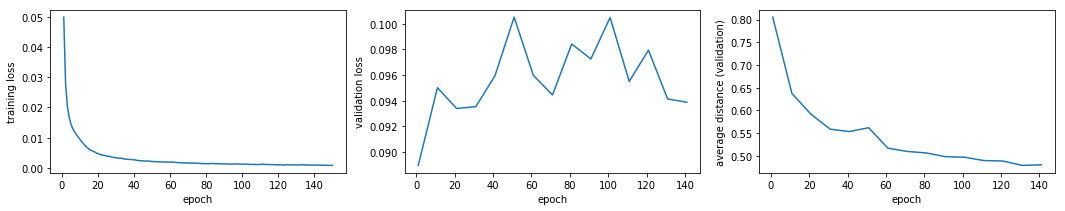

In [6]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18, 3)

sns.lineplot(x=range(1, num_epochs+1), y=trn_losses, ax=ax[0])
ax[0].set_xlabel('epoch'), ax[0].set_ylabel('training loss')

sns.lineplot(x=range(1, num_epochs+1, 10), y=val_losses, ax=ax[1])
ax[1].set_xlabel('epoch'), ax[1].set_ylabel('validation loss')

sns.lineplot(x=range(1, num_epochs+1, 10), y=avg_dists, markers=True, ax=ax[2])
ax[2].set_xlabel('epoch'), ax[2].set_ylabel('average distance (validation)')

In [24]:
best_epoch = (np.argmin(avg_dists) + 1) * 10
print("Best Epoch:", best_epoch, "Best average distance (val):", np.min(avg_dists))

data = torch.load(f"models/pytorch/128_avg/model_{best_epoch}.pth")

model = Generator(128).to(device)
model.eval()

model.load_state_dict(data["model_state_dict"])

Best Epoch: 140 Best average distance (val): 0.47868208058142386


In [25]:
test_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/test', size=64, n_hidden=128, train=False), batch_size=100)

In [26]:
test_dists = test(model, test_dataloader, dlib_models, device)

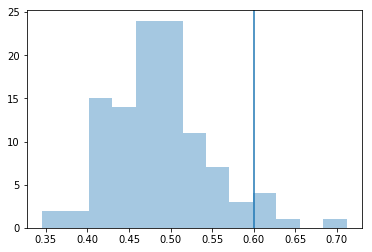

In [27]:
sns.distplot(test_dists, kde=False)
plt.axvline(x=0.6)
plt.show()

In [28]:
pct = percentileofscore(test_dists, 0.6)
mean = np.mean(test_dists)

print("Percent of synthesized images classified as same person at threshold 0.6:", pct, "Average distance (test):", mean)

Percent of synthesized images classified as same person at threshold 0.6: 94.44444444444444 Average distance (test): 0.48616942567538


In [29]:
vis_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/vis', size=64, n_hidden=128, train=False), batch_size=8)

In [30]:
vis_images, names = synthesize(model, vis_dataloader, device)

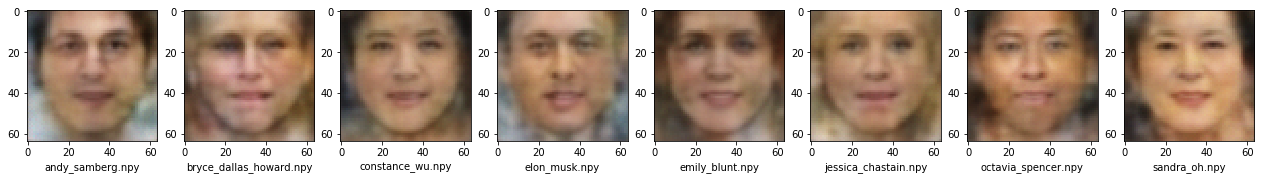

In [31]:
fig, ax = plt.subplots(1,len(vis_images))
fig.set_size_inches(22, 3)

for i in range(len(vis_images)):
    image, name = vis_images[i], names[i]
    ax[i].imshow(image)
    ax[i].set_xlabel(name.split("/")[-1])